In [82]:
# Standard PySceneDetect imports:
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.stats_manager import StatsManager

# For content-aware scene detection:
from scenedetect.detectors import ContentDetector, ThresholdDetector
from 

def find_scenes(video_path, threshold=30.0):
    # Create our video & scene managers, then add the detector.
    video_manager = VideoManager([video_path])
    stats_manager = StatsManager()
    scene_manager = SceneManager(stats_manager)
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))

    # Improve processing speed by downscaling before processing.
    video_manager.set_downscale_factor()
    
    
    # Start the video manager and perform the scene detection.
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager)
    
    
    
    # Each returned scene is a tuple of the (start, end) timecode.
    return scene_manager.get_scene_list(), stats_manager


In [83]:
scenes, stats = find_scenes("./trainingDataPreprocessing/video.mp4")
print(scenes)

100%|██████████████████████████████| 116445/116445 [04:17<00:00, 452.15frames/s]


[(FrameTimecode(frame=0, fps=25.000000), FrameTimecode(frame=6300, fps=25.000000)), (FrameTimecode(frame=6300, fps=25.000000), FrameTimecode(frame=6439, fps=25.000000)), (FrameTimecode(frame=6439, fps=25.000000), FrameTimecode(frame=6540, fps=25.000000)), (FrameTimecode(frame=6540, fps=25.000000), FrameTimecode(frame=11219, fps=25.000000)), (FrameTimecode(frame=11219, fps=25.000000), FrameTimecode(frame=11282, fps=25.000000)), (FrameTimecode(frame=11282, fps=25.000000), FrameTimecode(frame=11563, fps=25.000000)), (FrameTimecode(frame=11563, fps=25.000000), FrameTimecode(frame=11584, fps=25.000000)), (FrameTimecode(frame=11584, fps=25.000000), FrameTimecode(frame=14192, fps=25.000000)), (FrameTimecode(frame=14192, fps=25.000000), FrameTimecode(frame=20048, fps=25.000000)), (FrameTimecode(frame=20048, fps=25.000000), FrameTimecode(frame=20924, fps=25.000000)), (FrameTimecode(frame=20924, fps=25.000000), FrameTimecode(frame=22606, fps=25.000000)), (FrameTimecode(frame=22606, fps=25.000000

In [84]:
import matplotlib.pyplot as plt

In [86]:
v = [stats.get_metrics(x,["content_val"]) for x in range(116445)]

In [87]:
v = v[0:len(v):60]

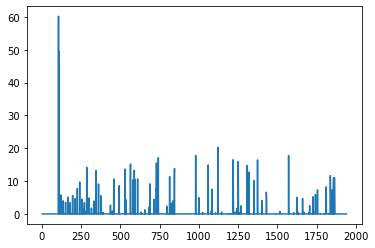

In [90]:
plt.plot(range(len(v)),v)

In [79]:
stats._registered_metrics

{'content_val', 'delta_hue', 'delta_lum', 'delta_sat'}

In [77]:
stats.get_metrics(60,["FRAME_SCORE_KEY"])

[None]

In [49]:
frame_lst = [x[0].get_frames() for x in scenes]

In [118]:
def capture(file, frames):
    cap = cv2.VideoCapture(file)
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    i = 0
    while (cap.isOpened() and i < len(frames)):
        j = frames[i]
        cap.set(1, j)
        ret, frame = cap.read()
        print(frame)
        print(type(frame))
        if ret == False:
            break
        
#         cv.imwrite("./trainingDataPreprocessing/img_y/" + "{:04d}".format(i) + ".png", frame)
        cv2.imwrite("q"+str(i) + ".bmp", frame)
        i += 1
        
    cap.release()
    cv2.destroyAllWindows()


In [115]:
frame

NameError: name 'frame' is not defined

In [119]:
capture("./trainingDataPreprocessing/video.mp4", sorted(frame_lst))

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'numpy.ndarray'>
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
<class 'numpy.ndarray'>


In [91]:
1

1

In [93]:
import numpy as np

In [103]:
a = np.random.randint(16, size=(5,6,3))

In [105]:
b = np.random.randint(16, size=(5,6,3))

In [111]:
b

array([[[ 1, 14, 14],
        [ 0, 13, 12],
        [12, 15,  7],
        [ 2,  5, 10],
        [13, 12, 15],
        [ 7, 13,  0]],

       [[13, 14,  6],
        [14,  1, 14],
        [14,  0,  4],
        [ 3,  7, 13],
        [ 7,  3,  9],
        [ 1, 10, 11]],

       [[ 9,  6,  7],
        [14,  6, 15],
        [ 9,  3,  1],
        [12, 10,  1],
        [ 6,  9,  1],
        [15, 12,  5]],

       [[11, 10,  2],
        [ 2, 11,  7],
        [ 2,  6,  0],
        [13, 12, 10],
        [14,  4, 15],
        [ 2, 10, 11]],

       [[ 6,  8,  3],
        [ 7,  2,  5],
        [11, 14,  5],
        [ 2,  3, 10],
        [13,  0, 13],
        [ 0,  1,  1]]])

In [110]:
a

array([[[ 0,  1, 15],
        [ 6, 12,  9],
        [ 9, 11, 12],
        [ 0,  6, 15],
        [13,  5, 11],
        [11,  9,  6]],

       [[12,  5, 11],
        [ 7, 13,  4],
        [14, 14, 11],
        [ 8, 14,  0],
        [ 9, 13,  7],
        [ 7, 14, 13]],

       [[ 7, 10, 11],
        [12, 10,  7],
        [ 9,  1, 10],
        [11,  9,  2],
        [10,  1, 10],
        [11, 14,  4]],

       [[ 5,  4,  2],
        [ 6,  3,  0],
        [ 3,  5,  7],
        [ 8, 14, 15],
        [14,  7, 11],
        [ 9,  0,  2]],

       [[ 4, 14, 14],
        [ 2, 14, 11],
        [ 8, 14,  5],
        [ 5,  1, 11],
        [10,  6,  2],
        [13,  7, 14]]])

In [113]:
combined = np.stack([a,b], axis=-1)

In [121]:
x = np.std(combined, axis=-1)

In [120]:
from numpy import linalg as LA

In [123]:
LA.norm(x, axis=-1)

array([[6.53834842, 3.39116499, 3.53553391, 2.73861279, 4.03112887,
        4.12310563],
       [5.17204022, 8.55862138, 7.82623792, 7.79422863, 5.19615242,
        3.74165739],
       [3.        , 4.58257569, 4.60977223, 0.8660254 , 6.34428877,
        2.29128785],
       [4.24264069, 5.67890835, 3.57071421, 3.67423461, 2.5       ,
        7.58287544],
       [6.34428877, 7.15891053, 1.5       , 1.87082869, 6.44204936,
        9.6695398 ]])

In [126]:
np.mean(np.sum((x * x), axis=-1) ** 0.5)

4.819192432587371

In [129]:
x

array([[[0.5, 6.5, 0.5],
        [3. , 0.5, 1.5],
        [1.5, 2. , 2.5],
        [1. , 0.5, 2.5],
        [0. , 3.5, 2. ],
        [2. , 2. , 3. ]],

       [[0.5, 4.5, 2.5],
        [3.5, 6. , 5. ],
        [0. , 7. , 3.5],
        [2.5, 3.5, 6.5],
        [1. , 5. , 1. ],
        [3. , 2. , 1. ]],

       [[1. , 2. , 2. ],
        [1. , 2. , 4. ],
        [0. , 1. , 4.5],
        [0.5, 0.5, 0.5],
        [2. , 4. , 4.5],
        [2. , 1. , 0.5]],

       [[3. , 3. , 0. ],
        [2. , 4. , 3.5],
        [0.5, 0.5, 3.5],
        [2.5, 1. , 2.5],
        [0. , 1.5, 2. ],
        [3.5, 5. , 4.5]],

       [[1. , 3. , 5.5],
        [2.5, 6. , 3. ],
        [1.5, 0. , 0. ],
        [1.5, 1. , 0.5],
        [1.5, 3. , 5.5],
        [6.5, 3. , 6.5]]])

In [139]:
x.reshape((x.shape[0]*x.shape[1], x.shape[-1]))

array([[0.5, 6.5, 0.5],
       [3. , 0.5, 1.5],
       [1.5, 2. , 2.5],
       [1. , 0.5, 2.5],
       [0. , 3.5, 2. ],
       [2. , 2. , 3. ],
       [0.5, 4.5, 2.5],
       [3.5, 6. , 5. ],
       [0. , 7. , 3.5],
       [2.5, 3.5, 6.5],
       [1. , 5. , 1. ],
       [3. , 2. , 1. ],
       [1. , 2. , 2. ],
       [1. , 2. , 4. ],
       [0. , 1. , 4.5],
       [0.5, 0.5, 0.5],
       [2. , 4. , 4.5],
       [2. , 1. , 0.5],
       [3. , 3. , 0. ],
       [2. , 4. , 3.5],
       [0.5, 0.5, 3.5],
       [2.5, 1. , 2.5],
       [0. , 1.5, 2. ],
       [3.5, 5. , 4.5],
       [1. , 3. , 5.5],
       [2.5, 6. , 3. ],
       [1.5, 0. , 0. ],
       [1.5, 1. , 0.5],
       [1.5, 3. , 5.5],
       [6.5, 3. , 6.5]])

In [138]:
np.mean(x, resha)

array([[1.33333333, 2.5       , 2.        ],
       [1.75      , 4.66666667, 3.25      ],
       [1.08333333, 1.75      , 2.66666667],
       [1.91666667, 2.5       , 2.66666667],
       [2.41666667, 2.66666667, 3.5       ]])

In [140]:
x.shape

(5, 6, 3)

In [143]:
y=np.transpose(x)

In [145]:
y

array([[[0.5, 0.5, 1. , 3. , 1. ],
        [3. , 3.5, 1. , 2. , 2.5],
        [1.5, 0. , 0. , 0.5, 1.5],
        [1. , 2.5, 0.5, 2.5, 1.5],
        [0. , 1. , 2. , 0. , 1.5],
        [2. , 3. , 2. , 3.5, 6.5]],

       [[6.5, 4.5, 2. , 3. , 3. ],
        [0.5, 6. , 2. , 4. , 6. ],
        [2. , 7. , 1. , 0.5, 0. ],
        [0.5, 3.5, 0.5, 1. , 1. ],
        [3.5, 5. , 4. , 1.5, 3. ],
        [2. , 2. , 1. , 5. , 3. ]],

       [[0.5, 2.5, 2. , 0. , 5.5],
        [1.5, 5. , 4. , 3.5, 3. ],
        [2.5, 3.5, 4.5, 3.5, 0. ],
        [2.5, 6.5, 0.5, 2.5, 0.5],
        [2. , 1. , 4.5, 2. , 5.5],
        [3. , 1. , 0.5, 4.5, 6.5]]])

In [150]:
np.mean(np.mean(x, axis=0), axis=0)

array([1.7       , 2.81666667, 2.81666667])